In [1]:
import numpy as np
import qp
import scipy.stats as ss
import matplotlib.pyplot as plt
import individual_metrics as inmet
%matplotlib inline

Create a qp PDF object centered at loc=5 with scale width=0.5.  Then, create points drawn from distributions with centers from the vector "centerpoints", offset from the true distribution, compute KS, CvM, AD stats and the p-values for each one

In [2]:
truefunc = ss.norm(loc=5.0,scale=0.5)
x = np.arange(0.0,10.0,0.02)
truex = truefunc.pdf(x)

In [3]:
truegrid=np.zeros([10000,len(truex)])
for i in range(10000):
    truegrid[i,:] = truex

In [4]:
true_pdf = qp.Ensemble(truegrid.shape[0],gridded=(x,truegrid))

made the pool of 4 in 0.0276501178741
made the catalog in 25.6949667931


In [5]:
truesample = np.array(truefunc.rvs(size=10000))

In [6]:
testtrue = inmet.EvaluateMetric(true_pdf,truesample)

In [7]:
trueks,truepval = testtrue.KS(using='gridded',dx=0.0001)
print trueks
print truepval

0.0102730823714
0.240226930267


In [8]:
truecvm,truecvmpval = testtrue.CvM(using='gridded',dx=0.0001)
print truecvm
print truecvmpval

0.260287615988
0.175701898934


In [9]:
truead, trueadpval = testtrue.AD(using='gridded',dx=0.0001,vmin=0.005,vmax=0.995)
print truead
print trueadpval

now with proper uniform range
1.44301217072
0.190688161285


In [10]:
centerpoints = np.array([-1.,0.0,1.,2.,3.,4.,4.5,4.7,4.9,4.95,5.0,5.05,5.10,5.3,5.5,6.,7.,8.,9.,10.,11.])
numpoints= len(centerpoints)
ksvals = np.zeros(numpoints)
kspvals = np.zeros(numpoints)
cvmvals = np.zeros(numpoints)
cvmpvals = np.zeros(numpoints)
advals = np.zeros(numpoints)
adpvals = np.zeros(numpoints)
vminx = 0.005
vmaxx = 0.995

In [11]:
for i,cent in enumerate(centerpoints):
    print "doing centerpoint %f"%(cent)
    xdist= ss.norm(loc=cent,scale=0.5)
    xsample = np.array(xdist.rvs(size=10000))
    testx = inmet.EvaluateMetric(true_pdf,xsample)
    ksvals[i],kspvals[i] = testx.KS(using='gridded',dx=0.0001)
    print ksvals[i]
    print kspvals[i]
    cvmvals[i],cvmpvals[i] = testx.CvM(using='gridded',dx=0.0001)
    print cvmvals[i]
    print cvmpvals[i]
    advals[i],adpvals[i] = testx.AD(using='gridded',dx=0.0001,vmin=vminx,vmax=vmaxx)
    print advals[i]
    print adpvals[i]


doing centerpoint -1.000000
1.0
0.0
3333.33333333
0.375298909236
now with proper uniform range
nan
nan
doing centerpoint 0.000000


/Users/sam/anaconda/lib/python2.7/site-packages/skgof/ecdfgof.py:81: RuntimeWarning: invalid value encountered in double_scalars
  return -samples - (factors * log(data * (1 - data[::-1]))).sum() / samples


0.999999990925
0.0
3333.33333331
0.375298909235
now with proper uniform range
nan
nan
doing centerpoint 1.000000
0.999941988723
0.0
3333.33313746
0.375298901436
now with proper uniform range
nan
nan
doing centerpoint 2.000000
0.997860438079
0.508502282681
3333.12611177
0.375290657803
now with proper uniform range
20.7107469475
0.000119999999964
doing centerpoint 3.000000
0.956559234208
0.49036967586
3291.35412347
0.373615619152
now with proper uniform range
2416.58772717
7.74193548159e-07
doing centerpoint 4.000000
0.680588672128
0.332329970434
2208.30327456
0.319586551931
now with proper uniform range
9908.39848312
8.26332461346e-08
doing centerpoint 4.500000
0.384665927269
0.0862509023464
792.078921469
0.178570541416
now with proper uniform range
3873.59139787
6.37619553823e-08
doing centerpoint 4.700000
0.233413532846
0.00467697555711
306.427929458
0.068741934272
now with proper uniform range
1488.27816219
6.1532150486e-08
doing centerpoint 4.900000
0.0806697997662
4.70348252412e-57

In [12]:
dists = centerpoints - 5.0
print dists

[-6.   -5.   -4.   -3.   -2.   -1.   -0.5  -0.3  -0.1  -0.05  0.    0.05
  0.1   0.3   0.5   1.    2.    3.    4.    5.    6.  ]


# dists is the distance of the center of the comparison set, so stats should have minimum value at dists=0.0, and p-values should have maxima at dists=0.0

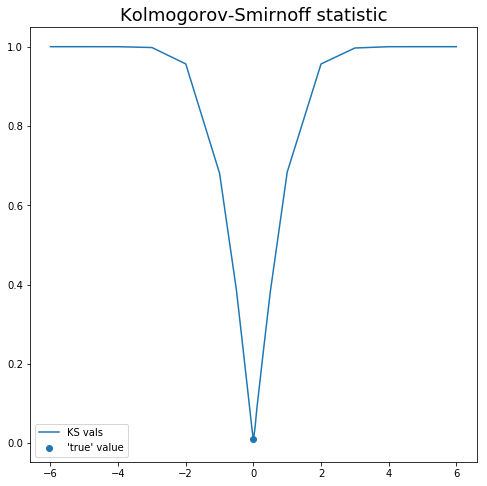

In [13]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,ksvals,label="KS vals")
plt.scatter([0.0],[trueks],label = "'true' value")
plt.legend()
plt.title("Kolmogorov-Smirnoff statistic",fontsize=18)

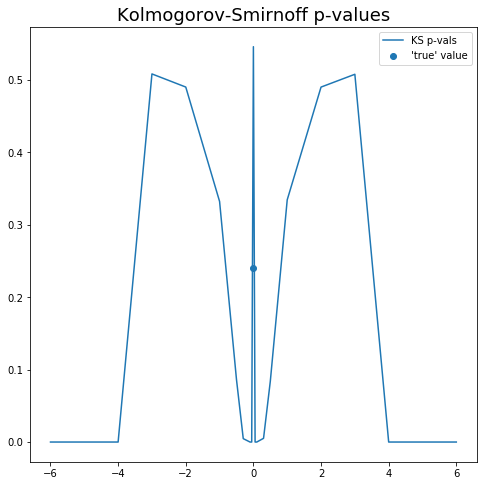

In [14]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,kspvals,label="KS p-vals")
plt.scatter([0.0],[truepval],label = "'true' value")
plt.legend()
plt.title("Kolmogorov-Smirnoff p-values",fontsize=18)

In [15]:
print ksvals
print kspvals

[ 1.          0.99999999  0.99994199  0.99786044  0.95655923  0.68058867
  0.38466593  0.23341353  0.0806698   0.04164411  0.0079712   0.04019164
  0.08555012  0.23586642  0.38181796  0.68374304  0.95646015  0.99669373
  0.99996637  1.          1.        ]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   5.08502283e-01
   4.90369676e-01   3.32329970e-01   8.62509023e-02   4.67697556e-03
   4.70348252e-57   1.66014922e-15   5.46128493e-01   1.79369743e-14
   4.01174201e-64   5.12577201e-03   8.39313145e-02   3.34565660e-01
   4.90324733e-01   5.08006094e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


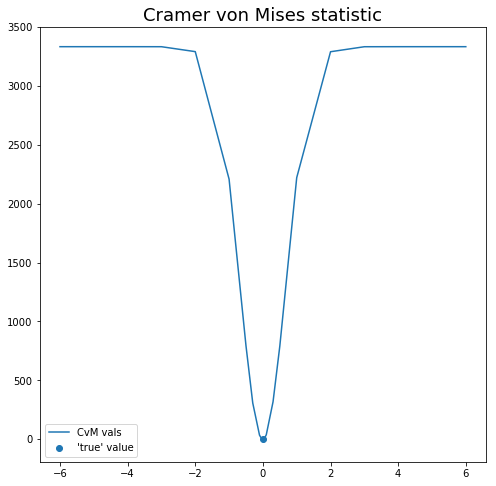

In [16]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmvals,label="CvM vals")
plt.scatter([0.0],[truecvm],label = "'true' value")
plt.legend()
plt.title("Cramer von Mises statistic",fontsize=18)

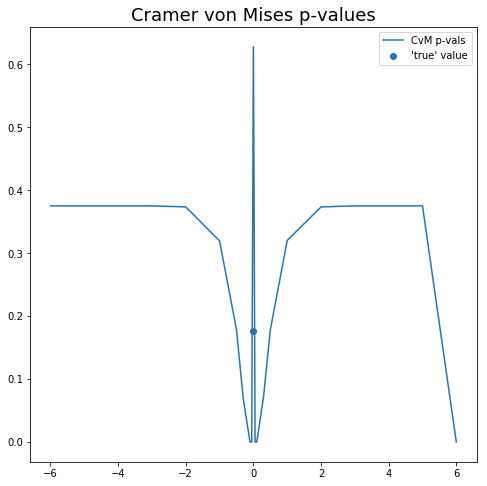

In [17]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmpvals,label="CvM p-vals")
plt.scatter([0.0],[truecvmpval],label = "'true' value")
plt.legend()
plt.title("Cramer von Mises p-values",fontsize=18)

In [18]:
print cvmvals
print cvmpvals

[  3.33333333e+03   3.33333333e+03   3.33333314e+03   3.33312611e+03
   3.29135412e+03   2.20830327e+03   7.92078921e+02   3.06427929e+02
   3.31871599e+01   9.06318609e+00   9.14921704e-02   8.57525867e+00
   3.66349954e+01   3.17025461e+02   7.89524256e+02   2.22084299e+03
   3.29046690e+03   3.33297258e+03   3.33333322e+03   3.33333333e+03
   3.33333333e+03]
[  3.75298909e-01   3.75298909e-01   3.75298901e-01   3.75290658e-01
   3.73615619e-01   3.19586552e-01   1.78570541e-01   6.87419343e-02
   2.43506412e-05   3.13082893e-14   6.28217762e-01   7.77156117e-15
   5.18372247e-05   7.19180982e-02   1.78142734e-01   3.20364821e-01
   3.73579787e-01   3.75284544e-01   3.75298905e-01   3.75298909e-01
   0.00000000e+00]


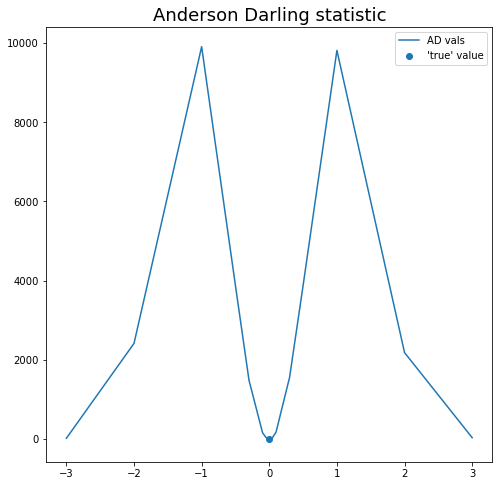

In [19]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,advals,label="AD vals")
plt.scatter([0.0],[truead],label = "'true' value")
plt.legend()
plt.title("Anderson Darling statistic", fontsize=18)

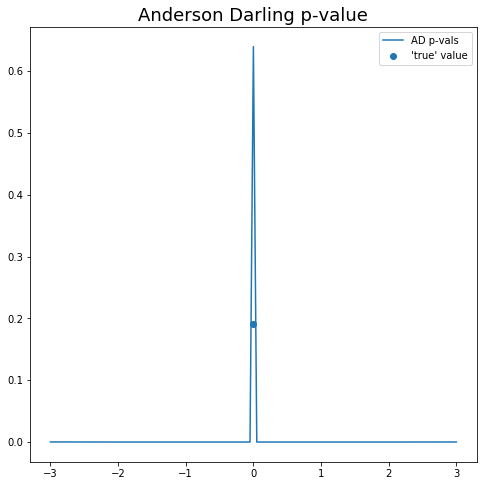

In [20]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,adpvals,label="AD p-vals")
plt.scatter([0.0],[trueadpval],label = "'true' value")
plt.legend()
plt.title("Anderson Darling p-value", fontsize=18)

In [21]:
print advals
print adpvals

[             nan              nan              nan   2.07107469e+01
   2.41658773e+03   9.90839848e+03   3.87359140e+03   1.48827816e+03
   1.63853319e+02   4.34596423e+01   6.09092212e-01   4.26794930e+01
   1.76067475e+02   1.55705683e+03   3.87749139e+03   9.81441474e+03
   2.18425039e+03   3.58352642e+01              nan              nan
              nan]
[             nan              nan              nan   1.20000000e-04
   7.74193548e-07   8.26332461e-08   6.37619554e-08   6.15321505e-08
   6.05754669e-08   6.05815832e-08   6.39441166e-01   6.05877006e-08
   6.06612072e-08   6.15574023e-08   6.36672326e-08   8.36236933e-08
   8.26446281e-07   6.66666666e-05              nan              nan
              nan]


# As we can see, while the p-value has a peak at dist=0.0, the p-value also rises when the distribution is far from the true distribution.  However, the statistics themselves seem fine